In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("text.csv")
df = df.drop(["Unnamed: 0"], axis=1)
df.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [3]:
from helper_cleaning import *

# get cleaned Text
df["clean_text"] = [
    remove_mult_spaces(
        filter_chars(
            remove_stopwords(clean_hashtags(strip_all_entities(remove_emojis(text))))
        )
    )
    for text in df["text"].values
]

[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
from sklearn.model_selection import train_test_split

# Feature and Targets
X = df["clean_text"]
y = df["label"]

# Split Data in Train and Test Set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [13]:
df.head()

,text,label,clean_text
0,i just feel really helpless and heavy hearted,4,feel really helpless heavy hearted
1,ive enjoyed being able to slouch about relax a...,0,ive enjoyed able slouch relax unwind frankly n...
2,i gave up my internship with the dmrg and am f...,4,gave internship dmrg feeling distraught
3,i dont know i feel so lost,0,dont know feel lost
4,i am a kindergarten teacher and i am thoroughl...,4,kindergarten teacher thoroughly weary job take...


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline

# tuned countvectorizer
count_vec = CountVectorizer(
    max_df=0.75, max_features=10000, min_df=1, ngram_range=(1, 2)
)

# tuned ridgeclassifer
clf = RidgeClassifier(alpha=10, class_weight="balanced", max_iter=75)

tuned_pipe = Pipeline([("vect", count_vec), ("clf", clf)])
tuned_pipe.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.75, max_features=10000,
                                 ngram_range=(1, 2))),
                ('clf',
                 RidgeClassifier(alpha=10, class_weight='balanced',
                                 max_iter=75))])

In [15]:
y_pred = tuned_pipe.predict(X_test)
y_pred[:10]

array([0, 0, 3, 0, 1, 2, 1, 1, 5, 0])

1. Printing Classification Report
              precision    recall  f1-score   support

     sadness       0.98      0.94      0.96     30217
         joy       0.98      0.89      0.93     35235
        love       0.74      0.98      0.84      8608
       anger       0.92      0.93      0.93     14349
        fear       0.89      0.88      0.88     11996
    surprise       0.69      0.99      0.81      3798

    accuracy                           0.92    104203
   macro avg       0.87      0.93      0.89    104203
weighted avg       0.93      0.92      0.92    104203

2. Plot Confusion Matrix


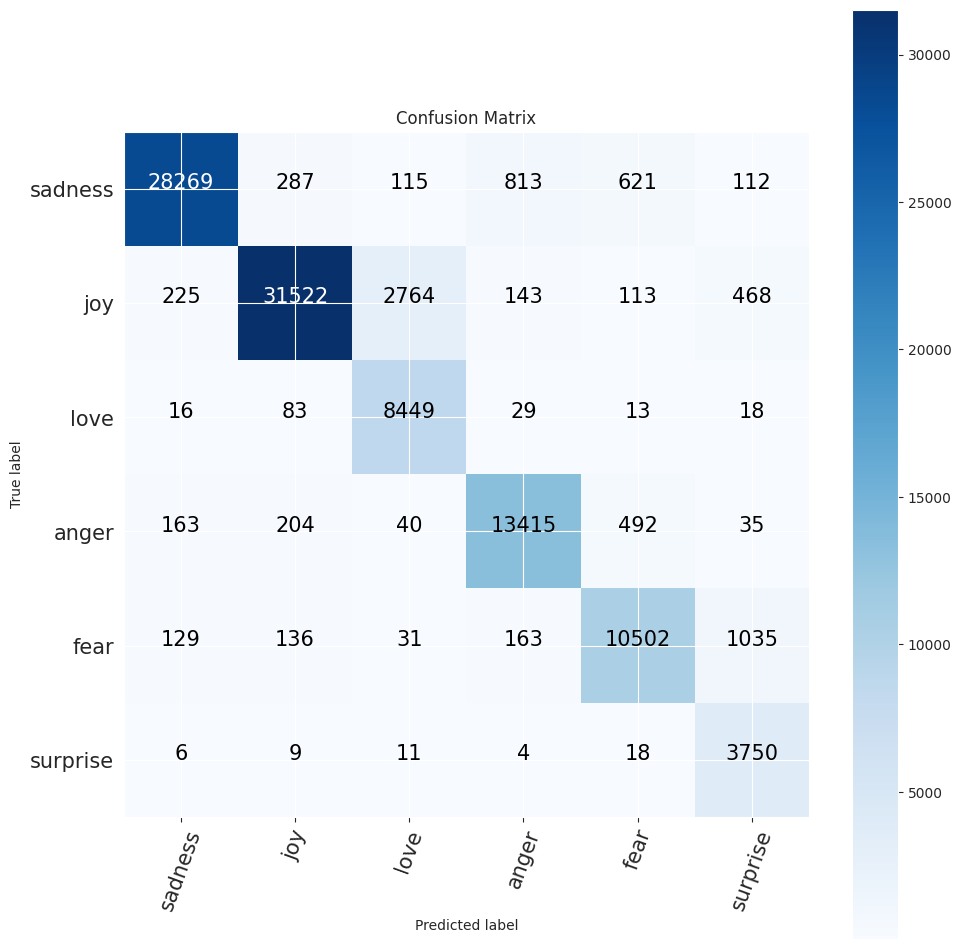

3. Getting wrong Predictions.


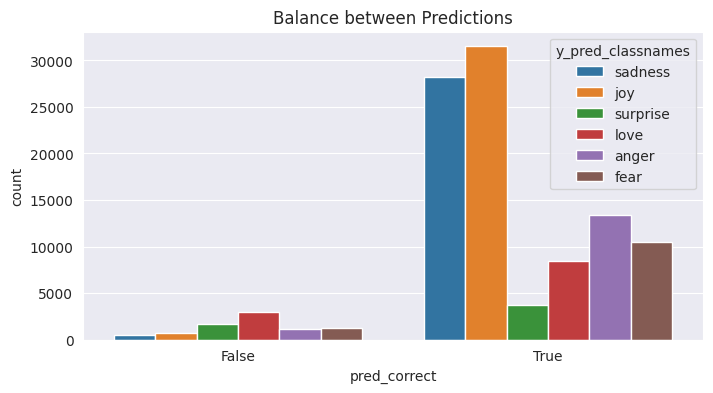

In [16]:
from evaluation_pipe import classification_evaluation_pipeline

# - sadness (0)
# - joy (1)
# - love (2)
# - anger (3)
# - fear (4)
# -  surprise (5).

classes = ["sadness", "joy", "love", "anger", "fear", "surprise"]

df, wrong_preds = classification_evaluation_pipeline(
    X_test=X_test, y_pred=y_pred, y_true=y_test, classes=classes, get_wrong_preds=True
)

In [19]:
df.head()

,text,y_true,y_pred,y_true_classnames,y_pred_classnames,pred_correct
0,id say maybe made feel foolish would reeeeeeal...,0,0,sadness,sadness,True
1,joined lds church admit feeling somewhat asham...,0,0,sadness,sadness,True
2,must admit didnt feel like hugging angry disgu...,3,3,anger,anger,True
3,hate still feel nerve damaged badly enough oft...,0,0,sadness,sadness,True
4,im actually feeling little smug,1,1,joy,joy,True


In [20]:
wrong_preds.head()

,text,y_true,y_pred,y_true_classnames,y_pred_classnames,pred_correct
0,born raised catholic since little hated going ...,4,0,fear,sadness,False
1,wasnt keen looking back shouldve got kinda cut...,0,1,sadness,joy,False
2,really wanna good one fun want friends feel we...,4,5,fear,surprise,False
3,merely uncomfortable tired feel amazing compar...,1,5,joy,surprise,False
4,could convince go without feeling ludicrous,0,5,sadness,surprise,False


- Baseline Accuracy: 89.074%
- Tuned Pipe without much Cleaning Accuracy: 91.654%

In [18]:
from sklearn.metrics import accuracy_score

# 0.4% more than Tuned Pipe without much cleaning.
acc_score = accuracy_score(y_pred=y_pred, y_true=y_test) * 100
print(f"Accuracy: {acc_score:.3f}%")

Accuracy: 92.039%
